In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("MathE.csv", delimiter=';', encoding='ISO-8859-1')

# Display basic structure
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB
None


In [2]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64


In [3]:
Q1 = df['Question ID'].quantile(0.25)
Q3 = df['Question ID'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Question ID'] < Q1 - 1.5 * IQR) | (df['Question ID'] > Q3 + 1.5 * IQR)]

print("Outliers in 'Question ID':")
print(outliers[['Question ID']].describe())

Outliers in 'Question ID':
       Question ID
count   646.000000
mean   1093.221362
std     112.683541
min     946.000000
25%    1005.000000
50%    1097.000000
75%    1117.000000
max    1549.000000


In [4]:
# Basic statistics for numeric columns
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
        Student ID  Question ID  Type of Answer
count  9546.000000  9546.000000     9546.000000
mean    775.402263   478.912319        0.468259
std     460.590559   249.244061        0.499018
min      26.000000    77.000000        0.000000
25%     380.000000   323.000000        0.000000
50%     885.000000   428.000000        0.000000
75%    1219.000000   571.000000        1.000000
max    1565.000000  1549.000000        1.000000


In [5]:
# Median calculation
print("Medians:")
print(df.median(numeric_only=True))

Medians:
Student ID        885.0
Question ID       428.0
Type of Answer      0.0
dtype: float64


Text(0.5, 1.0, 'Distribution of Type of Answer')

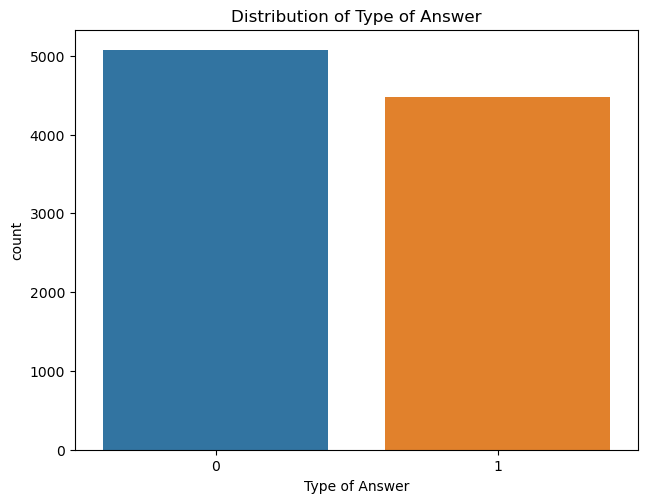

In [6]:
plt.figure(figsize=(16, 12))

#Histogram: Type of Answer
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Type of Answer')
plt.title('Distribution of Type of Answer')

Text(0.5, 1.0, 'Boxplot of Question ID by Type of Answer')

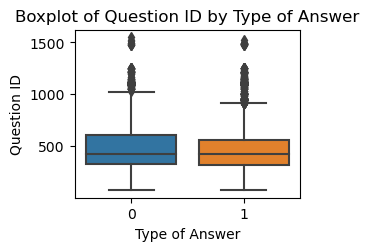

In [7]:
#Boxplot: Question ID by Type of Answer
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Type of Answer', y='Question ID')
plt.title('Boxplot of Question ID by Type of Answer')

Text(0.5, 1.0, 'Distribution of Student IDs')

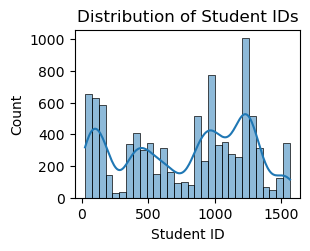

In [8]:
#Histogram: Student ID
plt.subplot(2, 2, 3)
sns.histplot(df['Student ID'], bins=30, kde=True)
plt.title('Distribution of Student IDs')

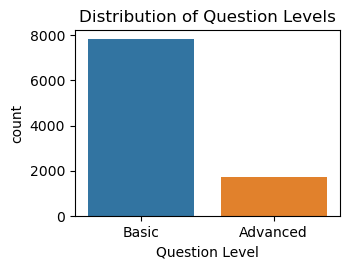

In [9]:
#Countplot: Question Level
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Question Level')
plt.title('Distribution of Question Levels')

plt.tight_layout()
plt.show()

In [10]:
# Clustering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD

In [12]:
#Load the dataset
df = pd.read_csv("MathE.csv", delimiter=';', encoding='ISO-8859-1')

#Select features for clustering
features = df[['Student Country', 'Question Level', 'Topic', 'Type of Answer']]

#Preprocessing pipeline
categorical_features = ['Student Country', 'Question Level', 'Topic']
numerical_features = ['Type of Answer']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

#Combine preprocessing + dimensionality reduction
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('reduce', TruncatedSVD(n_components=2, random_state=42))  # For 2D visualization
])

#Transform the data
X_preprocessed = pipeline.fit_transform(features)

In [13]:
#Find optimal number of clusters using silhouette score
sil_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    sil_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))

# 6. Choose the best k
optimal_k = cluster_range[np.argmax(sil_scores)]
print(sil_scores)
print(f"Optimal number of clusters (k): {optimal_k}")

[0.8050916233593739, 0.7235756208021851, 0.6628786973746855, 0.7586206256917379, 0.8394168518581312, 0.8476289153947115, 0.85557524656437, 0.8154335598470511, 0.776737817327052]
Optimal number of clusters (k): 8


In [14]:
#KMeans clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_preprocessed)

#Add cluster labels to DataFrame
df['Cluster'] = clusters

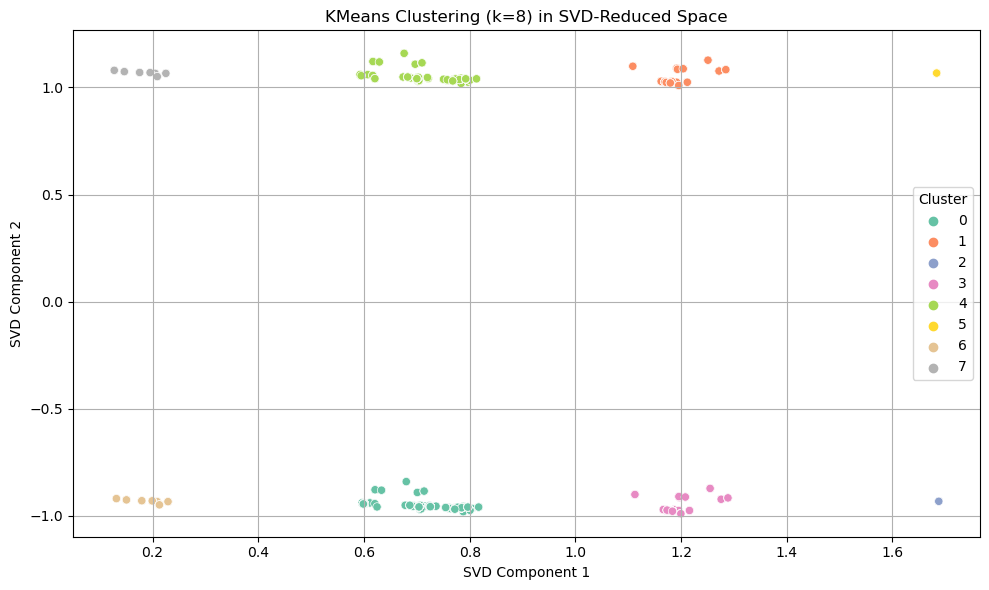

In [15]:
#Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_preprocessed[:, 0], y=X_preprocessed[:, 1], hue=clusters, palette='Set2', legend='full')
plt.title(f'KMeans Clustering (k={optimal_k}) in SVD-Reduced Space')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#Cluster summary statistics
cluster_summary = df.groupby('Cluster')[['Type of Answer']].agg(['count', 'mean'])
print("Cluster Summary (Type of Answer count & mean):")
print(cluster_summary)

Cluster Summary (Type of Answer count & mean):
        Type of Answer     
                 count mean
Cluster                    
0                 1227  0.0
1                 2353  1.0
2                 1382  0.0
3                 2387  0.0
4                  930  1.0
5                 1094  1.0
6                   80  0.0
7                   93  1.0


In [17]:
# Linear Regression Modeling

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Load the dataset
df = pd.read_csv("MathE.csv", delimiter=';', encoding='ISO-8859-1')

#Define target and predictors
target = 'Type of Answer'
predictors = ['Question ID', 'Student Country', 'Question Level', 'Topic']

#Prepare features and target variable
X = df[predictors]
y = df[target]

#One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [20]:
#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.0158
RMSE: 0.4954


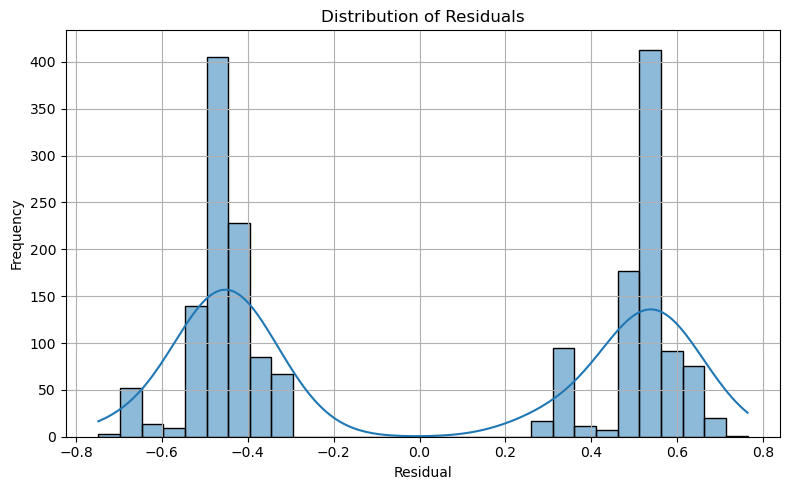

In [21]:
#Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()